In [ ]:
# For data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# C1 Diabetes dataset

In this challenge, we will build a simple model on the diabetes dataset. Please read the documentation.

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [ ]:
# Load the dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [ ]:
# Get input, output, and their names
X = diabetes.data
y = diabetes.target
names = diabetes.feature_names

In [ ]:
# Input, output array shapes
X.shape, y.shape

((442, 10), (442,))

In [ ]:
# First 5 data points
df = pd.DataFrame(np.concatenate((X, y[:, np.newaxis]), axis=1), columns=names + ['disease progression'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
# TASK 1.1

# Pick a single feature (e.g. bmi) to build a model
bmi = ...
bmi.shape

(442, 1)

Text(0, 0.5, 'disease progression')

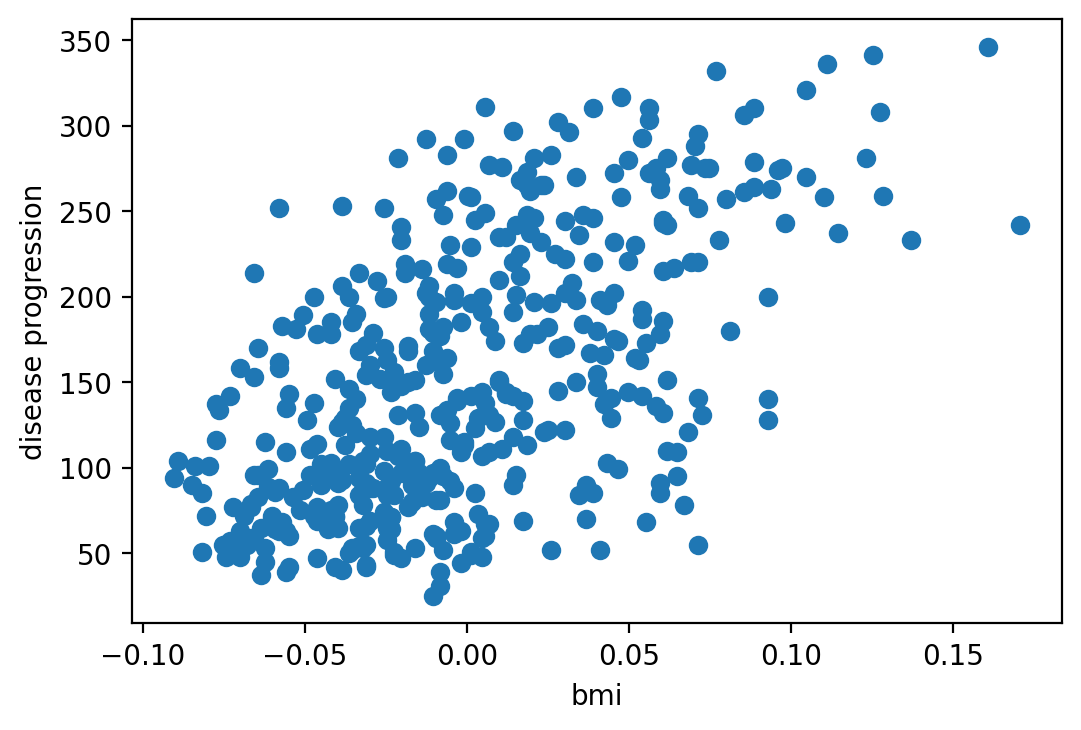

In [ ]:
# Plot bmi vs. target variable
plt.figure(dpi=200)
plt.scatter(bmi, y)
plt.xlabel('bmi')
plt.ylabel('disease progression')

In [ ]:
# TASK 1.2

# Split the dataset into train and test

X_train = ...
y_train = ...

X_test = ...
y_test = ...

In [ ]:
# Sanity check the shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((300, 1), (300,), (142, 1), (142,))

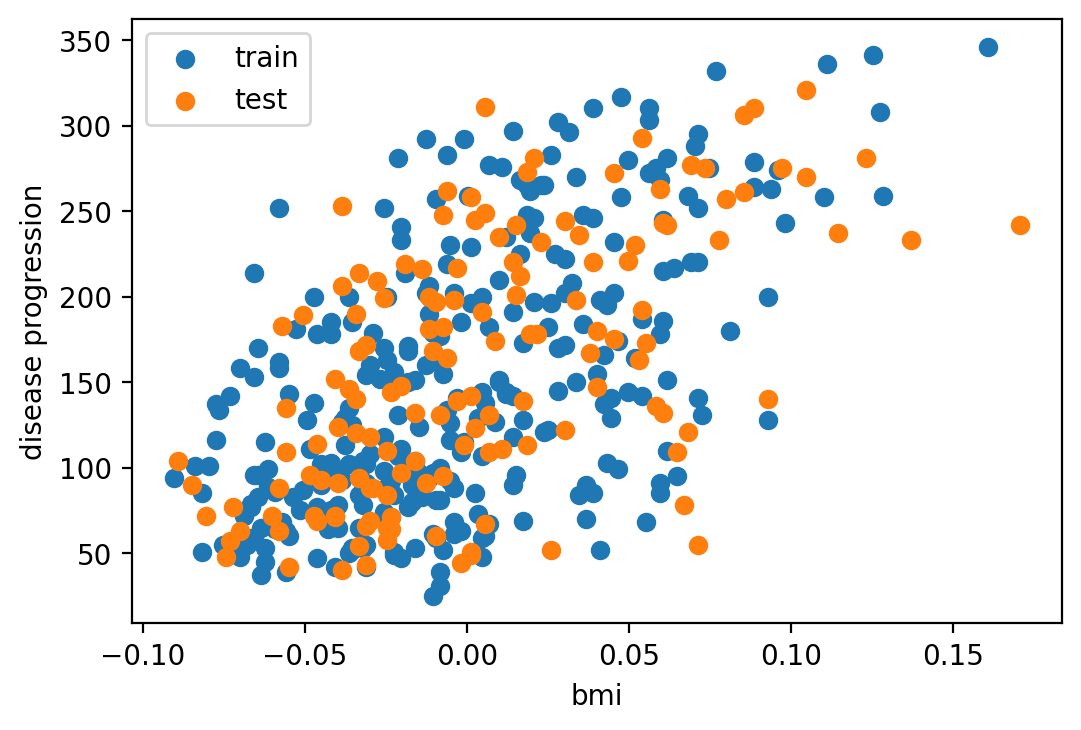

In [ ]:
# Plot train and test
plt.figure(dpi=200)
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.xlabel('bmi')
plt.ylabel('disease progression')
plt.legend()

In [ ]:
# Call the linear regression object
from sklearn import linear_model
model1 = linear_model.LinearRegression()

In [ ]:
# TASK 1.3

# Fit a model using model_name.fit()
model1.fit(...)

LinearRegression()

In [ ]:
# Get predictions for the test set
preds = model1.predict(X_test)

In [ ]:
# Check predictions vs. labels for the first 10 data points
print('Pred:', np.round(preds[:10]))
print('Labels:', y_test[:10])

Pred: [223. 127. 184. 185. 113. 112. 149. 121. 106. 152.]
Labels: [275.  65. 198. 236. 253. 124.  44. 172. 114. 142.]


In [ ]:
# TASK 1.4

# Calculate the mean absolute error
...

50.59683538302396

In [ ]:
# Calculate mean absolute error using sklearn.metrics
from sklearn import metrics
metrics.mean_absolute_error(y_test, preds)

50.59683538302396

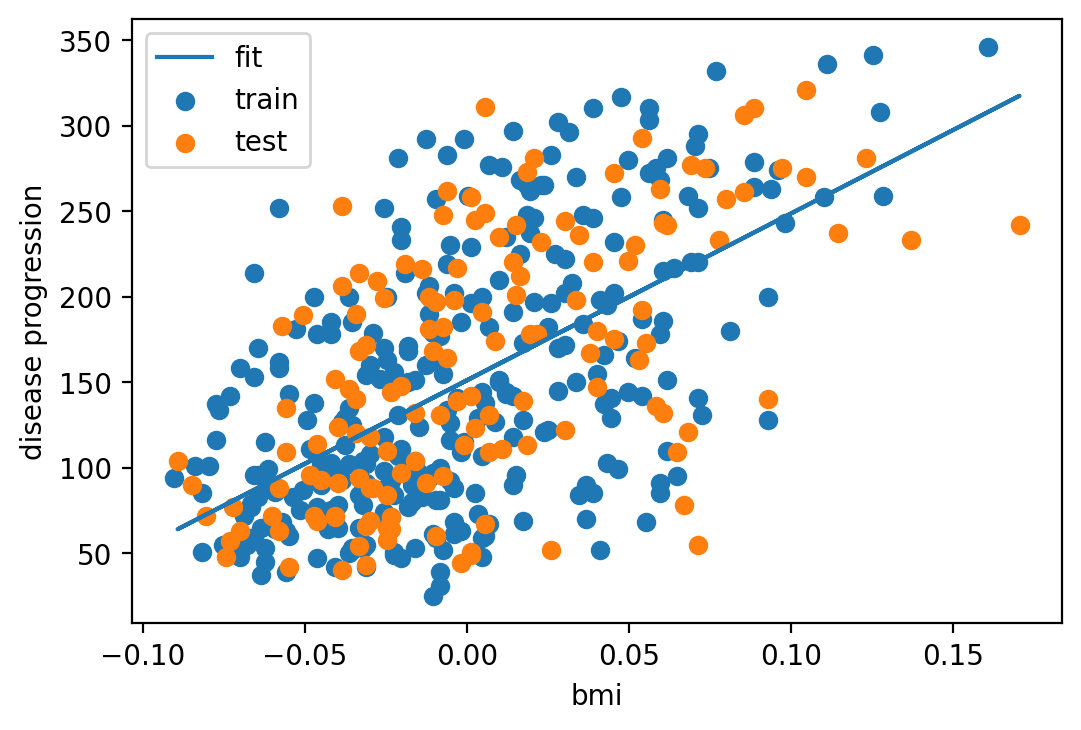

In [ ]:
# Plot train/test data with fit
plt.figure(dpi=200)
plt.scatter(X_train, y_train, label='train')
plt.plot(X_test, model1.predict(X_test), label='fit')
plt.scatter(X_test, y_test, label='test')
plt.xlabel('bmi')
plt.ylabel('disease progression')
plt.legend()

### What is the model learning?

model parameters (sometimes weights)

disease progression = θ<sub>0</sub> + θ<sub>1</sub> x bmi

In [ ]:
print('Thetha_zero is: ', model1.intercept_)
print('Thethat_one is:',model1.coef_[0])

Thetha_zero is:  151.03058342562278
Thethat_one is: 975.5736137025973


In [ ]:
# BMI of the first patient
bmi[0:1]

array([[0.06169621]])

In [ ]:
# Model prediction on the first patient
model1.predict(bmi[0:1])

array([211.21977457])

In [ ]:
# Model prediction on the first patient
model1.intercept_ + model1.coef_*bmi[0:1]

array([[211.21977457]])

### How to improve the model performance?

Use all features to develop a model

In [ ]:
# First 5 data points
df = pd.DataFrame(np.concatenate((X, y[:, np.newaxis]), axis=1), columns=names + ['disease progression'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
# Use all features
X_train = X[:300]
y_train = y[:300]

X_test = X[300:]
y_test = y[300:]

In [ ]:
# TASK 1.5 

# Call the linear regression object
...

In [ ]:
# TASK 1.6 

# Fit the model
...

LinearRegression()

In [ ]:
# TASK 1.7

# Get predictions on the test set
...

In [ ]:
# TASK 1.8 

# Calculate MAE with sklearn
...

41.203686659690995

disease progression = θ<sub>0</sub> + θ<sub>1</sub> x age + θ<sub>2</sub> x sex + θ<sub>3</sub> x bmi + θ<sub>4</sub> x bp+ θ<sub>5</sub> x s1+ θ<sub>6</sub> x s2+ θ<sub>7</sub> x s3+ θ<sub>8</sub> x s4+ θ<sub>9</sub> x s5+ θ<sub>10</sub> x s6

In [ ]:
# Print model coefficents
model1.coef_

array([ -16.57607993, -254.66532396,  560.98630022,  278.91811152,
       -393.41357305,   97.05460405,  -19.0023093 ,  169.46450327,
        632.95050374,  114.21638941])

In [ ]:
# Print intercept
model1.intercept_

152.34786451820108

Bonus challenge: Do the same with the random forest algorithm.

# C2 MNIST dataset

In [ ]:
# Download the MNIST dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# TASK 2.1

# Check array shapes
...

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Label:  0


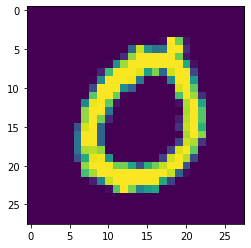

In [ ]:
# Random digit from the training set.
index = np.random.randint(0, 60000)
plt.imshow(x_train[index])
print('Label: ', y_train[index])

In [ ]:
# TASK 2.2

# Add a convolutional layer after the first layer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Activation, Dense

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)))
model2.add(Activation('relu'))
model2.add(...)
model2.add(...)
model2.add(Flatten())
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
 activation_2 (Activation)   (None, 10)                0

In [ ]:
# Set the optimizer and the loss
from tensorflow.keras.optimizers import Adam, SGD
opt = SGD(learning_rate=0.001)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Put data into suitable shape
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# Train and test
H = model2.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_test, y_test))

1875/1875 [==============================] - 77s 40ms/step - loss: 0.1343 - accuracy: 0.8444 - val_loss: 0.0662 - val_accuracy: 0.9223


Label: 6
Prediction:  6


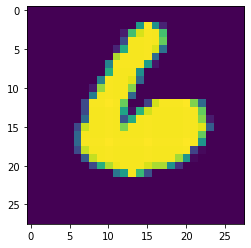

In [ ]:
# Random image from the test set
index = np.random.randint(0, 10000)
random_image = x_test[np.newaxis, index]
plt.imshow(random_image.reshape(28, 28))
print('Label:', np.argmax(y_test[index]))
print('Prediction: ', np.argmax(model2.predict(random_image)))  # model.predict(image)

# C3 PlantVillage_small dataset

In [ ]:
#@title Load dataset from GitHub
# Deleting files in tmp
# import shutil
# shutil.rmtree('/tmp/plants-main')
import zipfile
import os

# Gets the whole repo from github as a zip
!wget --no-check-certificate \
    "https://github.com/Ipsumio/plants/archive/refs/heads/main.zip" \
    -O "/tmp/pv_repository.zip"

# Reads the zip and extracts to tmp
zip_ref = zipfile.ZipFile('/tmp/pv_repository.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

# Dataset is also zipped, finds that and zips to tmp
zip_ref = zipfile.ZipFile('/tmp/plants-main/PlantVillage_small.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2022-06-11 13:03:04--  https://github.com/Ipsumio/plants/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Ipsumio/plants/zip/refs/heads/main [following]
--2022-06-11 13:03:04--  https://codeload.github.com/Ipsumio/plants/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/pv_repository.zip’

/tmp/pv_repository.     [  <=>               ]   5.60M  23.4MB/s    in 0.2s    

2022-06-11 13:03:05 (23.4 MB/s) - ‘/tmp/pv_repository.zip’ saved [5874746]



In [ ]:
import glob
import cv2

In [ ]:
# Load data
X = []
y = []
y_names = []
for i, folder_path in enumerate(glob.glob('/tmp/PlantVillage_small/*')):
    y_names.append(folder_path.split('/')[-1])
    for image_path in glob.glob(folder_path + '/*'):
        im = cv2.imread(image_path)
        X.append(im)
        y.append(i)
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

num_classes = len(np.unique(y))
print('Number of classes:', num_classes)
for pname in y_names:
    print(pname)

(7552, 32, 32, 3) (7552,)
Number of classes: 38
Corn_(maize)___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Peach___healthy
Cherry_(including_sour)___Powdery_mildew
Pepper,_bell___Bacterial_spot
Potato___Early_blight
Tomato___Late_blight
Squash___Powdery_mildew
Apple___Cedar_apple_rust
Cherry_(including_sour)___healthy
Orange___Haunglongbing_(Citrus_greening)
Apple___healthy
Apple___Apple_scab
Strawberry___healthy
Tomato___Tomato_mosaic_virus
Tomato___healthy
Pepper,_bell___healthy
Tomato___Early_blight
Peach___Bacterial_spot
Tomato___Leaf_Mold
Tomato___Target_Spot
Grape___Black_rot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Septoria_leaf_spot
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Blueberry___healthy
Potato___healthy
Tomato___Bacterial_spot
Apple___Black_rot
Raspberry___healthy
Soybean___healthy
Strawberry___Leaf_scorch
Corn_(maize)___Northern_Leaf_Blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Grape___Esca_(Black_Measles)
Potato___Late_bli

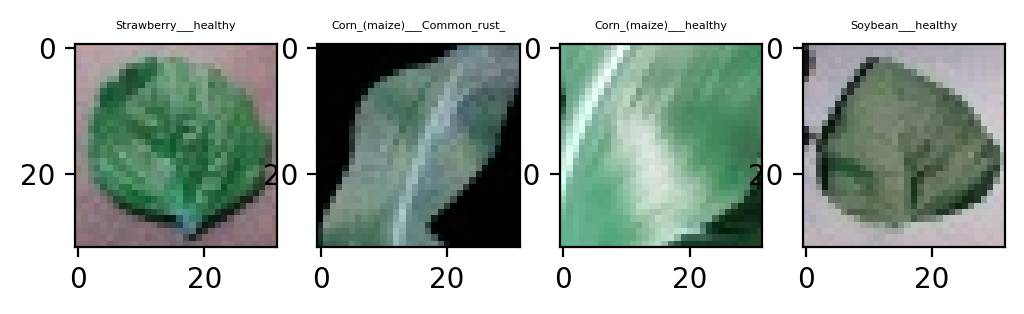

In [ ]:
# TASK 3.1

# Plot 4 random images from the dataset

fig, axs = plt.subplots(1, 4, dpi=200)
...

In [ ]:
# TASK 3.2

# Split the data into train and test set
from sklearn.model_selection import train_test_split
...

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (6041, 32, 32, 3)
y_train shape: (6041,)


In [ ]:
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (1511, 32, 32, 3)
y_test shape: (1511,)


In [ ]:
# Normalization
X_train = X_train/255
X_test = X_test/255

In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_train.shape, y_test.shape

((6041, 38), (1511, 38))

In [ ]:
input_shape = X.shape[1:]
input_shape

(32, 32, 3)

## 4. Define NN architecture

In [ ]:
# TASK 3.3

# Build the network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Activation, Dense, MaxPooling2D

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model3.add(Activation('relu'))
...
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 activation_4 (Activation)   (None, 8, 8, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                      

In [ ]:
pred = model3.predict(X_test[0:1])
pred

array([[0.02444351, 0.02254454, 0.03385813, 0.01856981, 0.02260854,
        0.02716943, 0.02949962, 0.02392498, 0.02638839, 0.02229135,
        0.02699467, 0.0166956 , 0.02211911, 0.02496275, 0.0360449 ,
        0.02578655, 0.02807271, 0.01977422, 0.02701623, 0.03125045,
        0.02883245, 0.02689185, 0.03481988, 0.0295074 , 0.03654089,
        0.03045028, 0.02273895, 0.02279009, 0.03167556, 0.02660297,
        0.02434159, 0.02419106, 0.02710159, 0.02822548, 0.01967759,
        0.03083778, 0.02038216, 0.02437696]], dtype=float32)

Text(0.5, 0, 'Class_id')

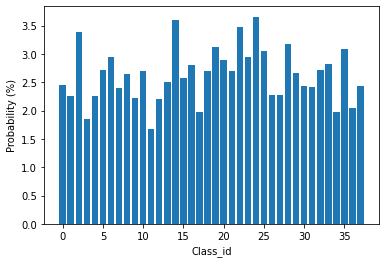

In [ ]:
plt.bar(np.unique(y), 100*pred.reshape(-1,))
plt.ylabel('Probability (%)')
plt.xlabel('Class_id')

In [ ]:
# TASK 3.4

# Compile the model
batch_size = ...
epochs = ...
model3.compile(loss=..., optimizer=..., metrics=...)

In [ ]:
# TASK 3.5

# Train the model

model3.fit(...)

Epoch 1/10
48/48 [==============================] - 6s 112ms/step - loss: 3.4352 - accuracy: 0.1081 - val_loss: 2.9220 - val_accuracy: 0.2124
Epoch 2/10
48/48 [==============================] - 5s 108ms/step - loss: 2.3601 - accuracy: 0.3703 - val_loss: 2.0548 - val_accuracy: 0.4130
Epoch 3/10
48/48 [==============================] - 5s 108ms/step - loss: 1.7979 - accuracy: 0.5046 - val_loss: 1.6667 - val_accuracy: 0.5381
Epoch 4/10
48/48 [==============================] - 5s 108ms/step - loss: 1.5499 - accuracy: 0.5569 - val_loss: 1.5100 - val_accuracy: 0.5559
Epoch 5/10
48/48 [==============================] - 5s 108ms/step - loss: 1.3728 - accuracy: 0.6045 - val_loss: 1.4238 - val_accuracy: 0.5506
Epoch 6/10
48/48 [==============================] - 5s 109ms/step - loss: 1.2658 - accuracy: 0.6386 - val_loss: 1.3048 - val_accuracy: 0.6089
Epoch 7/10
48/48 [==============================] - 5s 113ms/step - loss: 1.1423 - accuracy: 0.6684 - val_loss: 1.2379 - val_accuracy: 0.6393
Epoch 

## 7. Test

Text(0.5, 1.0, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus')

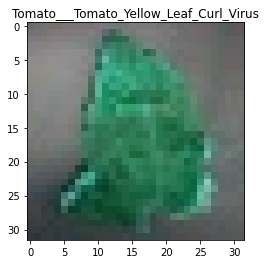

In [ ]:
# Show random image with label
plant_id = np.random.randint(y_test.shape[0])
plt.imshow(X_test[plant_id])
true_id = y_names[np.argmax(y_test[plant_id])]
plt.title(true_id)

In [ ]:
# Get a prediction on that image
single_image = X_test[plant_id:plant_id+1]
pred = model3.predict(single_image)
pred

array([[7.40312828e-07, 6.43999316e-04, 8.28311215e-07, 6.63674393e-10,
        5.60303626e-04, 7.22604454e-04, 1.19469725e-04, 3.92295886e-03,
        5.11252992e-02, 2.11013287e-01, 1.06332678e-04, 1.19202219e-01,
        4.73863651e-08, 2.38398416e-03, 3.57533681e-05, 3.32189813e-08,
        1.18021062e-02, 3.95017305e-05, 1.24039571e-03, 1.22247137e-01,
        2.71945400e-03, 7.16377544e-05, 2.21410563e-04, 5.20976260e-03,
        9.35877033e-04, 7.90883508e-03, 3.84475679e-05, 1.22298552e-05,
        1.82925463e-01, 2.28091885e-05, 1.73741981e-04, 6.15429929e-11,
        4.76973044e-04, 3.29011935e-03, 2.70786554e-01, 5.50864343e-06,
        2.79810702e-05, 6.18769582e-06]], dtype=float32)

Prediction: 34 Tomato___Tomato_Yellow_Leaf_Curl_Virus
Ground truth: 34 Tomato___Tomato_Yellow_Leaf_Curl_Virus


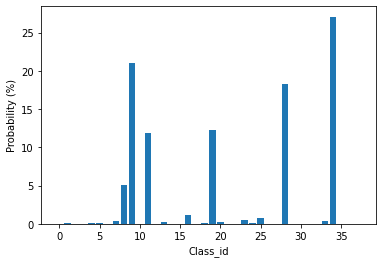

In [ ]:
# TASK 3.6

# Plot predicted probability for each class
plt.bar(...)
plt.ylabel('Probability (%)')
plt.xlabel('Class_id')

print('Prediction:', ...)
print('Ground truth:', ...)

Prediction: 26 Blueberry___healthy
Ground truth: 26 Blueberry___healthy


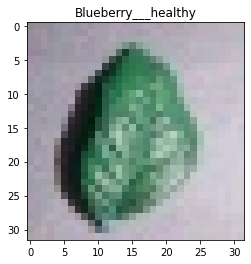

In [ ]:
# Putting it all together
# Get prediction on random images
plant_id = np.random.randint(y_test.shape[0])
pred = model3.predict(X_test[plant_id:plant_id+1])

plt.imshow(X_test[plant_id])
true_id = y_names[np.argmax(y_test[plant_id])]
plt.title(true_id)

print('Prediction:', np.argmax(pred), y_names[np.argmax(pred)])
print('Ground truth:', np.argmax(y_test[plant_id]), y_names[np.argmax(y_test[plant_id])])

In [ ]:
# TASK 3.7

# Calculate accuracy on the test set
...
print('Accuracy on the test set is ', np.round(test_acc*100, 2), '%')

48/48 [==============================] - 1s 12ms/step - loss: 1.1059 - accuracy: 0.6724
Accuracy on the test set is  67.24 %


# C4 Uncovering bias in the PlantVillage dataset

The final challenge is based on this paper: https://arxiv.org/abs/2206.04374

I would suggest reading it before attempting the challenge.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.datasets import mnist

In [ ]:
main_path = '/tmp/PlantVillage_small/'

In [ ]:
class_folders = []
class_names = []
for class_folder in glob.glob(main_path + '*'):
    class_folders.append(class_folder)
    class_names.append(class_folder.split('/')[-1])

In [ ]:
# Load images
images = []
y = []
y_names = []
for i in range(len(class_names)):
    for im_path in glob.glob(class_folders[i] + '/*'):
        im = cv2.imread(im_path)
        if im is None:continue
        if im.shape != (32, 32, 3):continue
        images.append(im)
        y.append(i)
        y_names.append(class_folders[i].split('/')[-1])
        
images = np.array(images)
y_names = np.array(y_names)
y = np.array(y)

In [ ]:
images.shape, y.shape

((7552, 32, 32, 3), (7552,))

In [ ]:
# TASK 4.1

'''
Write a function that takes any number of images,
as a numpy array,
with the following shape:
(number_of_images, h, w, 1) for gray images
(number_of_images, h, w, 3) for RGB images

Returned array should be of size
(number_of_images, 8) for gray images
(number_of_images, 24) for RGB images

'''
def feature_extractor(images):
    ...
    return X

In [ ]:
X = feature_extractor(images)

In [ ]:
X.shape, y.shape

((7552, 24), (7552,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# TASK 4.2

# Train a random forest classifier
...

RandomForestClassifier(random_state=0)

In [ ]:
# Calculate accuracy
acc_result = clf.score(X_test, y_test)
np.round(acc_result*100, 1)

43.7

In [ ]:
# random guess
np.round(100/38, 1)

2.6